In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [16]:
train = pd.read_csv('train.csv')
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [17]:
train.isna().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    10
dtype: int64

In [18]:
train.tail()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
175,2013,11,MenClothing,798.0
176,2013,11,OtherClothing,1209.0
177,2013,12,WomenClothing,4865.0
178,2013,12,MenClothing,1085.0
179,2013,12,OtherClothing,1566.0


In [19]:
train.shape

(180, 4)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [21]:
train.describe()

,Year,Month,Sales(In ThousandDollars)
count,180.000000,180.000000,170.000000
mean,2011.000000,6.500000,1616.729412
std,1.418158,3.461682,1158.224405
min,2009.000000,1.000000,471.000000
25%,2010.000000,3.750000,704.000000
50%,2011.000000,6.500000,1041.000000
75%,2012.000000,9.250000,2609.750000
max,2013.000000,12.000000,4865.000000


In [22]:
train['ProductCategory'].unique()

array(['WomenClothing', 'MenClothing', 'OtherClothing'], dtype=object)

In [23]:
train['Sales'] = train['Sales(In ThousandDollars)']
train.drop('Sales(In ThousandDollars)', axis = 1, inplace = True)
train.head()

,Year,Month,ProductCategory,Sales
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [24]:
train['Sales'] = train['Sales'].fillna(train['Sales'].median())
train.isna().sum()

Year               0
Month              0
ProductCategory    0
Sales              0
dtype: int64

In [25]:
X = train[['Month', 'ProductCategory']]
X.head()

,Month,ProductCategory
0,1,WomenClothing
1,1,MenClothing
2,1,OtherClothing
3,2,WomenClothing
4,2,MenClothing


In [26]:
X_dum = pd.get_dummies(X, drop_first = True)
X_dum.head()

,Month,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,1,0,1
1,1,0,0
2,1,1,0
3,2,0,1
4,2,0,0


In [27]:
y = train['Sales']

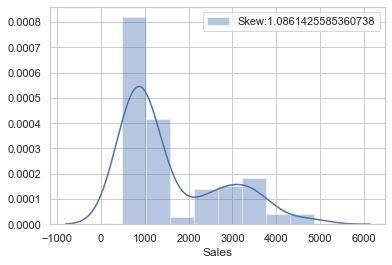

In [28]:
sns.distplot(y, label = f'Skew:{y.skew()}')
plt.legend(loc = 'best')
plt.show()

In [29]:
y_log = np.log(y)

In [30]:
y_log.skew()

0.4784349575677508

In [31]:
type(y)

pandas.core.series.Series

In [32]:
y_bxcx, _ = stats.boxcox(y)
type(y_bxcx)

numpy.ndarray

In [33]:
y_bxcx = pd.Series(y_bxcx)
y_bxcx.skew()

0.13459741631832264

In [43]:
lr = LinearRegression()
lr.fit(X_dum, y_log)
lr.score(X_dum, y_log)

0.8874507709770808

In [36]:
sub = pd.read_csv('submission.csv')
sub.head()

,Year,Month,ProductCategory,Unnamed: 3,Sales(In ThousandDollars)
0,2014,1,WomenClothing,NaN,NaN
1,2014,1,MenClothing,NaN,NaN
2,2014,1,OtherClothing,NaN,NaN
3,2014,2,WomenClothing,NaN,NaN
4,2014,2,MenClothing,NaN,NaN


In [37]:
sub.drop(['Year', 'Unnamed: 3', 'Sales(In ThousandDollars)'], axis = 1, inplace = True)
sub = pd.get_dummies(sub, drop_first = True)
sub

,Month,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,1,0,1
1,1,0,0
2,1,1,0
3,2,0,1
4,2,0,0
5,2,1,0
6,3,0,1
7,3,0,0
8,3,1,0
9,4,0,1


In [44]:
pred = lr.predict(sub)
pred = np.exp(pred)
pred

array([2469.01283403,  570.21414388,  908.41954849, 2537.82101205,
        586.10527081,  933.73602038, 2608.54678455,  602.43926278,
        959.75802943, 2681.24359238,  619.22846188,  986.50523804,
       2755.96636574,  636.48555412, 1013.99785659, 2832.77156565,
        654.2235791 , 1042.25665868, 2911.71722664,  672.45593977,
       1071.30299684, 2992.86300058,  691.19641264, 1101.15881869,
       3076.27020175,  710.45915812, 1131.84668349, 3162.00185318,
        730.25873127, 1163.38977918, 3250.12273429,  750.61009279,
       1195.81193994, 3340.69942981,  771.5286203 , 1229.13766418])

In [45]:
kaggle = pd.read_csv('Kaggle_Submission_Format.csv')
kaggle

,Year,Sales(In ThousandDollars)
0,1,1000
1,2,1000
2,3,1000
3,4,1000
4,5,1000
5,6,1000
6,7,1000
7,8,1000
8,9,1000
9,10,1000


In [46]:
kaggle.columns

Index(['Year', 'Sales(In ThousandDollars)'], dtype='object')

In [47]:
kaggle['Sales(In ThousandDollars)'] = pred

In [51]:
kaggle.to_csv('SLR1', index = False)
kaggle

,Year,Sales(In ThousandDollars)
0,1,2469.012834
1,2,570.214144
2,3,908.419548
3,4,2537.821012
4,5,586.105271
5,6,933.736020
6,7,2608.546785
7,8,602.439263
8,9,959.758029
9,10,2681.243592


In [52]:
kaggle.shape

(36, 2)